# <font color='grey'><center> Hubert10 😎 </center></font> 

#  <font color='orange'><center> Smog </center></font>

#### Plik 'Smog' (.xlsx) zawiera informacje dotyczące wartości pyłu 'PM10' oraz 'PM2.5' dla miast w Polsce. 

https://www.wikipedia.org/ :

- PM10 – mieszanina zawieszonych w powietrzu cząsteczek o średnicy nie większej niż 10 μm
- PM2,5 – aerozole atmosferyczne (pył zawieszony) o średnicy nie większej niż 2,5 μm, który zdaniem Światowej Organizacji Zdrowia jest najbardziej szkodliwy dla zdrowia człowieka spośród wszystkich zanieczyszczeń atmosferycznych.

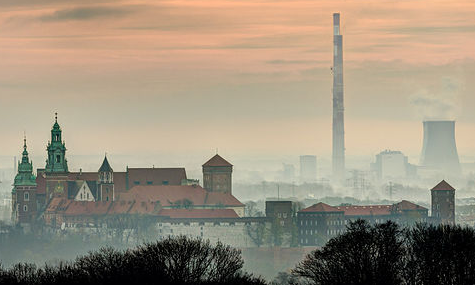

#  <font color='orange'><center> Opis </center></font>
### <font color='orange'> Podstawowe informacje </font>
- 452280 rekordów 
- 9 kolumn
- Dane od: 2019-09-02
- Dane do: 2020-02-09
- Ilość dni: 161
- Miasto z największą ilością rekordów - Kraków: 28367 
- Miasto z najmniejszą ilością rekordów - Augustów: 1385

### <font color='orange'> Informacje po dokładnym przejrzeniu danych </font>
- Brak duplikatów w pliku
- 365 'Null' w kolumnie 'Wartosc'
- Unikalne indeksy: Prawda
- 23 'PR10' zamiast 'PM10' w kolumnie 'Parametr'
- 9 'PS25' zamiast 'PM2.5' w kolumnie 'Parametr'
- 17 województw, bo występuje 'ŚLĄSKIE' oraz 121 'Silesia' (łacińska nazwa Śląska) w kolumnie 'Wojewodztwo'
- dane dla np. Krakowa/Warszawy zbierane są w kilku miejscach, ponieważ jest inna wartość pyłu oraz szerokość i długość geograficzna dla tej samej daty i godziny
- 132 'Wartosc' < 0, a stężenie pyłu nie może być mniejsze od 0


### <font color='purple'>Modyfikacja danych </font>
- 'Parametr' - zamiana 23 'PR10' na 'PM10' 
- 'Parametr' - zamiana 9 'PS25' na 'PM2.5'
- 'Wojewodztwo' - zamiana 121 'Silesia' (łacińska nazwa Śląska) na 'ŚLĄSKIE'
- 'Wartosc' - usunięcie 132 rekordów z 'Wartosc' < 0
- 'Wartosc' - usunięcie 365 rekordów 'Null' z 'Wartosc'

# <font color='orange'><center> Spis treści </center></font>

### <font color='orange'> 1. Przeglądanie danych </font>
- Szybki podgląd
- Sprawdzenie unikalnych wartości dla danej kolumny
- Wielkość, szerokość i typ danych
- Puste wartości
- Duplikaty
- Indeksy
- Funkcja loc
- Zamiana wartości
- Maski
- Modyfikacje kolumn
- value_counts()
- To_Frame
- groupby

### <font color='orange'> 2. Modyfikacja danych </font>
- Parametr
- Wojewodztwo
- Wartosc

### <font color='orange'> 3. Prezentacja danych na wykresach </font>
- wykres1 & wykres2 - Dane pomiarowe pyłu PM10 i PM2.5 ze stacji Warszawa-Komunikacyjna (7.10.2019r.)
- wykres3 - Średnia wartość pyłu PM10 stacji Kraków, Aleja Krasińskiego (Listopad)
- wykres4 - Średnia wartość pyłu PM2.5 w Warszawie z dnia 7.12.2019r.

#  <font color='purple'><center> Zadanie </center></font>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Instalacja bibliotek do pracy z plikami Excel:
- xlwt – zapis do plików .xls
- openpyxl – zapis do plików .xlsx
- xlrd – odczyt z plików .xls oraz .xlsx

In [5]:
pip install xlwt openpyxl xlrd

Note: you may need to restart the kernel to use updated packages.


In [6]:
smog = pd.read_excel('C:\\Users\\V6\Desktop\\Smog.xlsx')
smog

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
0,2019-09-02,0,PM10,27.8500,52.793122,18.241044,Inowrocław,inowrocławski,KUJAWSKO-POMORSKIE
1,2019-09-02,0,PM10,24.7769,50.972167,14.941319,Działoszyn,zgorzelecki,DOLNOŚLĄSKIE
2,2019-09-02,0,PM10,7.9492,50.732817,16.648050,Dzierżoniów,dzierżoniowski,DOLNOŚLĄSKIE
3,2019-09-02,0,PM10,8.6594,50.433493,16.653660,Kłodzko,kłodzki,DOLNOŚLĄSKIE
4,2019-09-02,0,PM10,16.6597,50.942073,17.291333,Oława,oławski,DOLNOŚLĄSKIE
...,...,...,...,...,...,...,...,...,...
452275,2020-02-09,18,PM10,33.3700,50.878998,20.633692,Kielce,Kielce,ŚWIĘTOKRZYSKIE
452276,2020-02-09,18,PM2.5,26.1200,50.878998,20.633692,Kielce,Kielce,ŚWIĘTOKRZYSKIE
452277,2020-02-09,18,PM2.5,30.7245,52.420319,16.877289,Poznań,Poznań,WIELKOPOLSKIE
452278,2020-02-09,17,PM10,22.3649,50.675693,18.682065,Lubliniec,lubliniecki,ŚLĄSKIE


#  <font color='orange'><center> 1. Przeglądanie danych </center></font>

# Szybki podgląd

In [7]:
smog.head()

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
0,2019-09-02,0,PM10,27.8500,52.793122,18.241044,Inowrocław,inowrocławski,KUJAWSKO-POMORSKIE
1,2019-09-02,0,PM10,24.7769,50.972167,14.941319,Działoszyn,zgorzelecki,DOLNOŚLĄSKIE
2,2019-09-02,0,PM10,7.9492,50.732817,16.648050,Dzierżoniów,dzierżoniowski,DOLNOŚLĄSKIE
3,2019-09-02,0,PM10,8.6594,50.433493,16.653660,Kłodzko,kłodzki,DOLNOŚLĄSKIE
4,2019-09-02,0,PM10,16.6597,50.942073,17.291333,Oława,oławski,DOLNOŚLĄSKIE


In [8]:
smog[15250:15255]

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
15250,2019-10-05,16,PM10,15.0735,50.710889,19.458797,Złoty Potok,częstochowski,ŚLĄSKIE
15251,2019-10-05,15,PM10,14.5763,50.710889,19.458797,Złoty Potok,częstochowski,ŚLĄSKIE
15252,2019-10-05,14,PM10,18.1760,50.710889,19.458797,Złoty Potok,częstochowski,ŚLĄSKIE
15253,2019-10-05,13,PM10,11.0586,50.710889,19.458797,Złoty Potok,częstochowski,ŚLĄSKIE
15254,2019-10-05,12,PM10,13.4849,50.710889,19.458797,Złoty Potok,częstochowski,ŚLĄSKIE


In [9]:
smog.tail()

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
452275,2020-02-09,18,PM10,33.3700,50.878998,20.633692,Kielce,Kielce,ŚWIĘTOKRZYSKIE
452276,2020-02-09,18,PM2.5,26.1200,50.878998,20.633692,Kielce,Kielce,ŚWIĘTOKRZYSKIE
452277,2020-02-09,18,PM2.5,30.7245,52.420319,16.877289,Poznań,Poznań,WIELKOPOLSKIE
452278,2020-02-09,17,PM10,22.3649,50.675693,18.682065,Lubliniec,lubliniecki,ŚLĄSKIE
452279,2020-02-09,17,PM2.5,18.3834,51.642656,15.127808,Żary,żarski,LUBUSKIE


# Sprawdzenie unikalnych wartości dla danej kolumny

In [10]:
smog.Data.unique()
# zakres dat: 2.09.2019-9.02.2020

array(['2019-09-02T00:00:00.000000000', '2019-09-03T00:00:00.000000000',
       '2019-09-04T00:00:00.000000000', '2019-09-05T00:00:00.000000000',
       '2019-09-06T00:00:00.000000000', '2019-09-07T00:00:00.000000000',
       '2019-09-08T00:00:00.000000000', '2019-09-09T00:00:00.000000000',
       '2019-09-10T00:00:00.000000000', '2019-09-11T00:00:00.000000000',
       '2019-09-12T00:00:00.000000000', '2019-09-13T00:00:00.000000000',
       '2019-09-14T00:00:00.000000000', '2019-09-15T00:00:00.000000000',
       '2019-09-16T00:00:00.000000000', '2019-09-17T00:00:00.000000000',
       '2019-09-18T00:00:00.000000000', '2019-09-19T00:00:00.000000000',
       '2019-09-20T00:00:00.000000000', '2019-09-21T00:00:00.000000000',
       '2019-09-22T00:00:00.000000000', '2019-09-23T00:00:00.000000000',
       '2019-09-24T00:00:00.000000000', '2019-09-25T00:00:00.000000000',
       '2019-09-26T00:00:00.000000000', '2019-09-27T00:00:00.000000000',
       '2019-09-28T00:00:00.000000000', '2019-09-29

In [11]:
len(smog.Data.unique().tolist())

161

In [12]:
len(smog.Data.unique())

161

# Wielkość, szerokość i typ danych
- shape - (liczba wierszy,liczba kolumn);
- info() - kolumna, ilość rekordów które zawierają wartości (inne niż NaN), typ danych
- describe() - zawieraja podstawowe statystyki dla kolumn przechowujących liczby

In [13]:
smog.shape

(452280, 9)

In [14]:
smog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452280 entries, 0 to 452279
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Data         452280 non-null  datetime64[ns]
 1   Godzina      452280 non-null  int64         
 2   Parametr     452280 non-null  object        
 3   Wartosc      451915 non-null  float64       
 4   SzerGeo      452280 non-null  float64       
 5   DlugGeo      452280 non-null  float64       
 6   Miasto       452280 non-null  object        
 7   Powiat       452280 non-null  object        
 8   Wojewodztwo  452280 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.1+ MB


In [15]:
smog.describe()

,Godzina,Wartosc,SzerGeo,DlugGeo
count,452280.000000,451915.000000,452280.000000,452280.000000
mean,11.468241,29.020155,51.657232,19.202073
std,6.917516,26.582987,1.432441,2.009041
min,0.000000,-131.354000,49.293564,14.553900
25%,5.000000,13.244700,50.349608,18.048389
50%,11.000000,22.194500,51.667981,19.234446
75%,17.000000,35.900000,52.658467,20.837489
max,23.000000,961.468000,54.560836,23.290247


# Puste wartości

In [16]:
smog[125:130].isnull()

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
125,False,False,False,False,False,False,False,False,False
126,False,False,False,False,False,False,False,False,False
127,False,False,False,False,False,False,False,False,False
128,False,False,False,False,False,False,False,False,False
129,False,False,False,False,False,False,False,False,False


In [17]:
smog.isnull().sum()

Data             0
Godzina          0
Parametr         0
Wartosc        365
SzerGeo          0
DlugGeo          0
Miasto           0
Powiat           0
Wojewodztwo      0
dtype: int64

In [18]:
smog.isnull().sum().sum()

365

In [19]:
smog.notnull().sum()

Data           452280
Godzina        452280
Parametr       452280
Wartosc        451915
SzerGeo        452280
DlugGeo        452280
Miasto         452280
Powiat         452280
Wojewodztwo    452280
dtype: int64

In [20]:
smog.notnull().sum().sum()

4070155

# Duplikaty

In [21]:
smog.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
452275    False
452276    False
452277    False
452278    False
452279    False
Length: 452280, dtype: bool

In [22]:
smog.duplicated().sum()

0

In [23]:
# Usunięcie duplikatów - gdyby były
smog.drop_duplicates()

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
0,2019-09-02,0,PM10,27.8500,52.793122,18.241044,Inowrocław,inowrocławski,KUJAWSKO-POMORSKIE
1,2019-09-02,0,PM10,24.7769,50.972167,14.941319,Działoszyn,zgorzelecki,DOLNOŚLĄSKIE
2,2019-09-02,0,PM10,7.9492,50.732817,16.648050,Dzierżoniów,dzierżoniowski,DOLNOŚLĄSKIE
3,2019-09-02,0,PM10,8.6594,50.433493,16.653660,Kłodzko,kłodzki,DOLNOŚLĄSKIE
4,2019-09-02,0,PM10,16.6597,50.942073,17.291333,Oława,oławski,DOLNOŚLĄSKIE
...,...,...,...,...,...,...,...,...,...
452275,2020-02-09,18,PM10,33.3700,50.878998,20.633692,Kielce,Kielce,ŚWIĘTOKRZYSKIE
452276,2020-02-09,18,PM2.5,26.1200,50.878998,20.633692,Kielce,Kielce,ŚWIĘTOKRZYSKIE
452277,2020-02-09,18,PM2.5,30.7245,52.420319,16.877289,Poznań,Poznań,WIELKOPOLSKIE
452278,2020-02-09,17,PM10,22.3649,50.675693,18.682065,Lubliniec,lubliniecki,ŚLĄSKIE


In [24]:
# Usunięcie duplikatów dla kolumny 'Data' - gdyby były
smog.Data.drop_duplicates()

0        2019-09-02
282      2019-09-03
581      2019-09-04
880      2019-09-05
1196     2019-09-06
            ...    
434746   2020-02-05
438387   2020-02-06
442036   2020-02-07
445766   2020-02-08
449406   2020-02-09
Name: Data, Length: 161, dtype: datetime64[ns]

# Indeksy

In [25]:
# zakres indeksów
smog.index

RangeIndex(start=0, stop=452280, step=1)

In [26]:
# sprawdzenie czy indeksy sa unikalne
smog.index.is_unique

True

# Funkcja loc
loc (locate) daje większe możliwości niż nawiasy kwadratowe.

In [27]:
smog.loc[:5]
#smog[:5]

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
0,2019-09-02,0,PM10,27.8500,52.793122,18.241044,Inowrocław,inowrocławski,KUJAWSKO-POMORSKIE
1,2019-09-02,0,PM10,24.7769,50.972167,14.941319,Działoszyn,zgorzelecki,DOLNOŚLĄSKIE
2,2019-09-02,0,PM10,7.9492,50.732817,16.648050,Dzierżoniów,dzierżoniowski,DOLNOŚLĄSKIE
3,2019-09-02,0,PM10,8.6594,50.433493,16.653660,Kłodzko,kłodzki,DOLNOŚLĄSKIE
4,2019-09-02,0,PM10,16.6597,50.942073,17.291333,Oława,oławski,DOLNOŚLĄSKIE
5,2019-09-02,0,PM10,7.6287,50.768729,16.269677,Wałbrzych,Wałbrzych,DOLNOŚLĄSKIE


In [28]:
smog.loc[5]
#smog[5:6]

Data           2019-09-02 00:00:00
Godzina                          0
Parametr                      PM10
Wartosc                     7.6287
SzerGeo                    50.7687
DlugGeo                    16.2697
Miasto                   Wałbrzych
Powiat                   Wałbrzych
Wojewodztwo           DOLNOŚLĄSKIE
Name: 5, dtype: object

# Zamiana wartości

In [29]:
# wyżej Wartosc:7.6287
smog.loc[5, 'Wartosc'] = 100
smog.loc[5]

Data           2019-09-02 00:00:00
Godzina                          0
Parametr                      PM10
Wartosc                        100
SzerGeo                    50.7687
DlugGeo                    16.2697
Miasto                   Wałbrzych
Powiat                   Wałbrzych
Wojewodztwo           DOLNOŚLĄSKIE
Name: 5, dtype: object

# Maski
Większe możliwości wyświetlania i modyfikacji wierszy na bazie wartości kolumn.
W Excel-u używa się do tego filtrów.

In [30]:
#Znajdź wszystkie "Wartosc" dla Miasto Wrocław

#for index, zawartosc in smog.iterrows():
#    if zawartosc['Miasto'] == 'Wrocław':
#        print(zawartosc['Wartosc'])

# w komentarzu, ponieważ wywołanie w '.html' zajmuje bardzo dużo miejsca

In [31]:
#Znajdź wszystkie "Wartosc" dla Miasto Wrocław
for index, zawartosc in smog.iterrows():
    if (zawartosc['Miasto'] == 'Wrocław') & (zawartosc['Wartosc'] < 0):
        print(zawartosc['Wartosc'])

-24.9592
-15.491
-19.6082


In [32]:
smog[  (smog['Miasto'] == 'Wrocław') & (smog['Wartosc'] < 0 )  ]

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
50181,2019-10-15,19,PM2.5,-24.9592,51.129378,17.02925,Wrocław,Wrocław,DOLNOŚLĄSKIE
54985,2019-10-17,2,PM10,-15.4910,51.129378,17.02925,Wrocław,Wrocław,DOLNOŚLĄSKIE
331887,2019-12-31,6,PM10,-19.6082,51.129378,17.02925,Wrocław,Wrocław,DOLNOŚLĄSKIE


In [33]:
smog[  (smog['Miasto'] == 'Wrocław') | (smog['Wartosc'] < 0 )  ]

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
6,2019-09-02,0,PM2.5,7.1758,51.129378,17.029250,Wrocław,Wrocław,DOLNOŚLĄSKIE
7,2019-09-02,0,PM2.5,3.4721,51.086225,17.012689,Wrocław,Wrocław,DOLNOŚLĄSKIE
21,2019-09-02,2,PM2.5,11.7132,51.129378,17.029250,Wrocław,Wrocław,DOLNOŚLĄSKIE
22,2019-09-02,1,PM2.5,7.6551,51.129378,17.029250,Wrocław,Wrocław,DOLNOŚLĄSKIE
23,2019-09-02,2,PM2.5,8.3379,51.086225,17.012689,Wrocław,Wrocław,DOLNOŚLĄSKIE
...,...,...,...,...,...,...,...,...,...
451984,2020-02-09,16,PM2.5,15.2619,51.086225,17.012689,Wrocław,Wrocław,DOLNOŚLĄSKIE
452080,2020-02-09,17,PM10,24.5452,51.129378,17.029250,Wrocław,Wrocław,DOLNOŚLĄSKIE
452135,2020-02-09,18,PM2.5,20.3674,51.129378,17.029250,Wrocław,Wrocław,DOLNOŚLĄSKIE
452136,2020-02-09,17,PM2.5,17.3338,51.086225,17.012689,Wrocław,Wrocław,DOLNOŚLĄSKIE


In [34]:
# wyszukaj dane dla Warszawy z dnia '2020-02-08'
smog[  (smog['Data'] =='2020-02-08' ) & (smog['Miasto'] == 'Warszawa')]

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
445806,2020-02-08,0,PM10,58.50,52.219298,21.004724,Warszawa,Warszawa,MAZOWIECKIE
445807,2020-02-08,0,PM2.5,33.41,52.219298,21.004724,Warszawa,Warszawa,MAZOWIECKIE
445808,2020-02-08,0,PM10,69.03,52.160772,21.033819,Warszawa,Warszawa,MAZOWIECKIE
445809,2020-02-08,0,PM2.5,60.88,52.160772,21.033819,Warszawa,Warszawa,MAZOWIECKIE
445914,2020-02-08,0,PM10,25.54,52.285073,20.933018,Warszawa,Warszawa,MAZOWIECKIE
...,...,...,...,...,...,...,...,...,...
449298,2020-02-08,23,PM2.5,50.30,52.160772,21.033819,Warszawa,Warszawa,MAZOWIECKIE
449400,2020-02-08,23,PM10,56.75,52.285073,20.933018,Warszawa,Warszawa,MAZOWIECKIE
449401,2020-02-08,22,PM10,49.90,52.285073,20.933018,Warszawa,Warszawa,MAZOWIECKIE
449402,2020-02-08,23,PM2.5,54.68,52.285073,20.933018,Warszawa,Warszawa,MAZOWIECKIE


In [35]:
# dane dla Warszawy zbierane są w kilku miejscach, 
# ponieważ jest inna szerokość i długość geograficzna dla tej samej daty i godziny
smog[(smog['Data'] =='2020-02-08' ) & (smog['Godzina'] == 20) & (smog['Parametr'] == 'PM10') & (smog['Miasto'] == 'Warszawa')]

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
448844,2020-02-08,20,PM10,78.97,52.219298,21.004724,Warszawa,Warszawa,MAZOWIECKIE
448846,2020-02-08,20,PM10,42.95,52.160772,21.033819,Warszawa,Warszawa,MAZOWIECKIE
448949,2020-02-08,20,PM10,42.08,52.285073,20.933018,Warszawa,Warszawa,MAZOWIECKIE


# Modyfikacje kolumn

In [36]:
#zamiana wartości w kolumnie "Powiat", tam gdzie występuje "Wrocław" w kolumnie "Miasto"
smog.loc[ smog['Miasto'] == 'Wrocław', 'Powiat'] = "Wioska Smerfów"

In [37]:
smog [smog['Miasto'] == 'Wrocław']

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
6,2019-09-02,0,PM2.5,7.1758,51.129378,17.029250,Wrocław,Wioska Smerfów,DOLNOŚLĄSKIE
7,2019-09-02,0,PM2.5,3.4721,51.086225,17.012689,Wrocław,Wioska Smerfów,DOLNOŚLĄSKIE
21,2019-09-02,2,PM2.5,11.7132,51.129378,17.029250,Wrocław,Wioska Smerfów,DOLNOŚLĄSKIE
22,2019-09-02,1,PM2.5,7.6551,51.129378,17.029250,Wrocław,Wioska Smerfów,DOLNOŚLĄSKIE
23,2019-09-02,2,PM2.5,8.3379,51.086225,17.012689,Wrocław,Wioska Smerfów,DOLNOŚLĄSKIE
...,...,...,...,...,...,...,...,...,...
451984,2020-02-09,16,PM2.5,15.2619,51.086225,17.012689,Wrocław,Wioska Smerfów,DOLNOŚLĄSKIE
452080,2020-02-09,17,PM10,24.5452,51.129378,17.029250,Wrocław,Wioska Smerfów,DOLNOŚLĄSKIE
452135,2020-02-09,18,PM2.5,20.3674,51.129378,17.029250,Wrocław,Wioska Smerfów,DOLNOŚLĄSKIE
452136,2020-02-09,17,PM2.5,17.3338,51.086225,17.012689,Wrocław,Wioska Smerfów,DOLNOŚLĄSKIE


# value_counts()

In [38]:
# określa ilość występowania danej daty w zbiorze
smog.Data.value_counts()

2019-11-07    3833
2019-11-06    3823
2019-11-05    3821
2019-11-17    3814
2019-11-08    3811
              ... 
2019-09-16     286
2019-09-30     279
2019-09-10     275
2019-10-01     268
2019-10-27     246
Name: Data, Length: 161, dtype: int64

Text(0.5, 0, 'x')

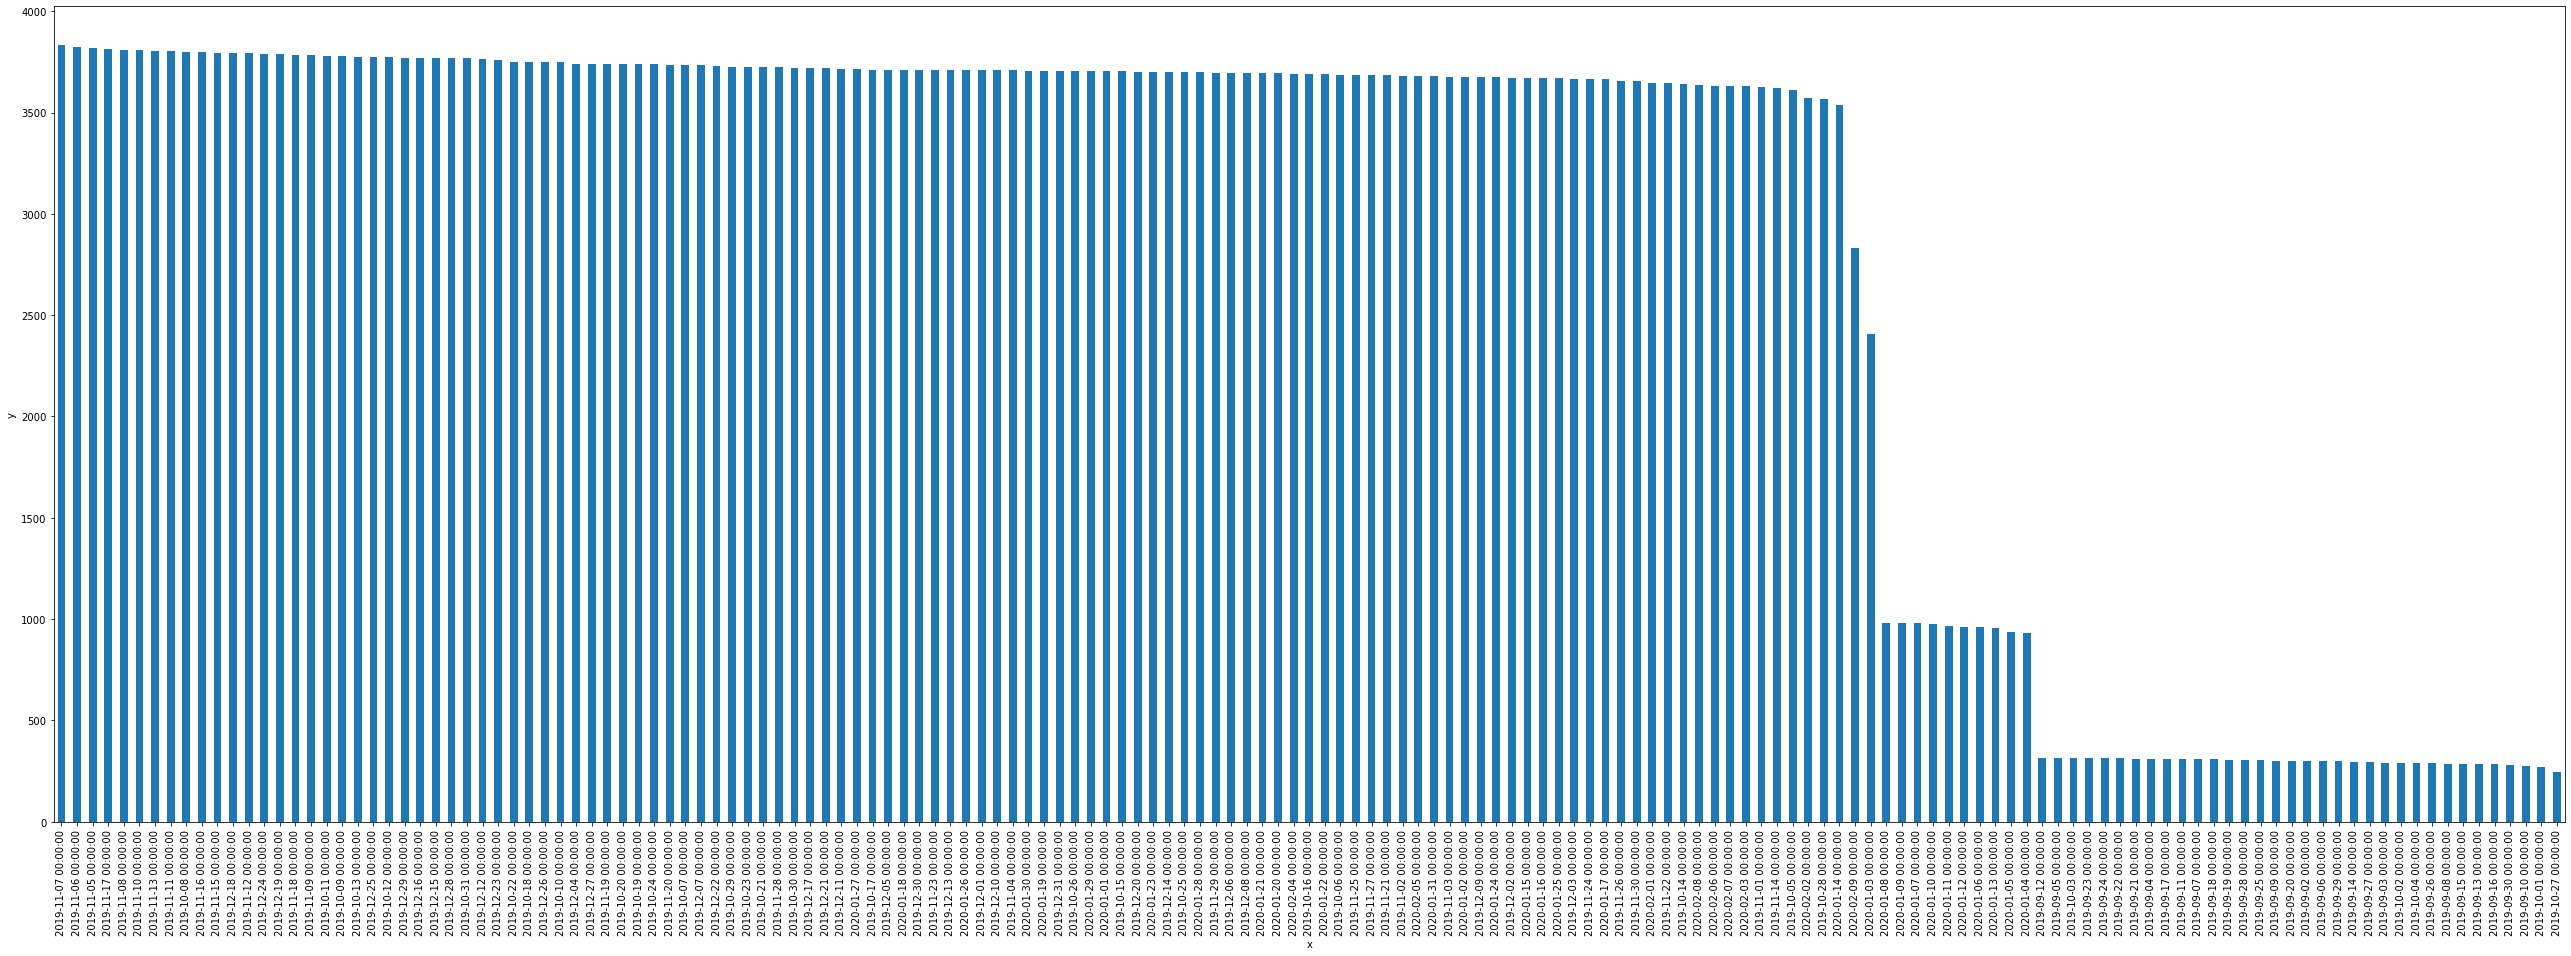

In [39]:
# Przedstawienie ilości dat na wykresie
# na wykresie są wymieszane daty
a = smog.Data.value_counts()
a.plot(kind='bar', figsize=(45, 15))
plt.ylabel('y')
plt.xlabel('x')

In [40]:
smog.Godzina.value_counts()

1     19075
2     18988
4     18980
3     18969
6     18960
5     18955
8     18954
7     18942
9     18915
10    18866
11    18850
17    18850
16    18844
12    18834
18    18815
15    18809
14    18767
13    18761
21    18711
19    18704
20    18694
0     18686
22    18686
23    18665
Name: Godzina, dtype: int64

Text(0.5, 0, 'x')

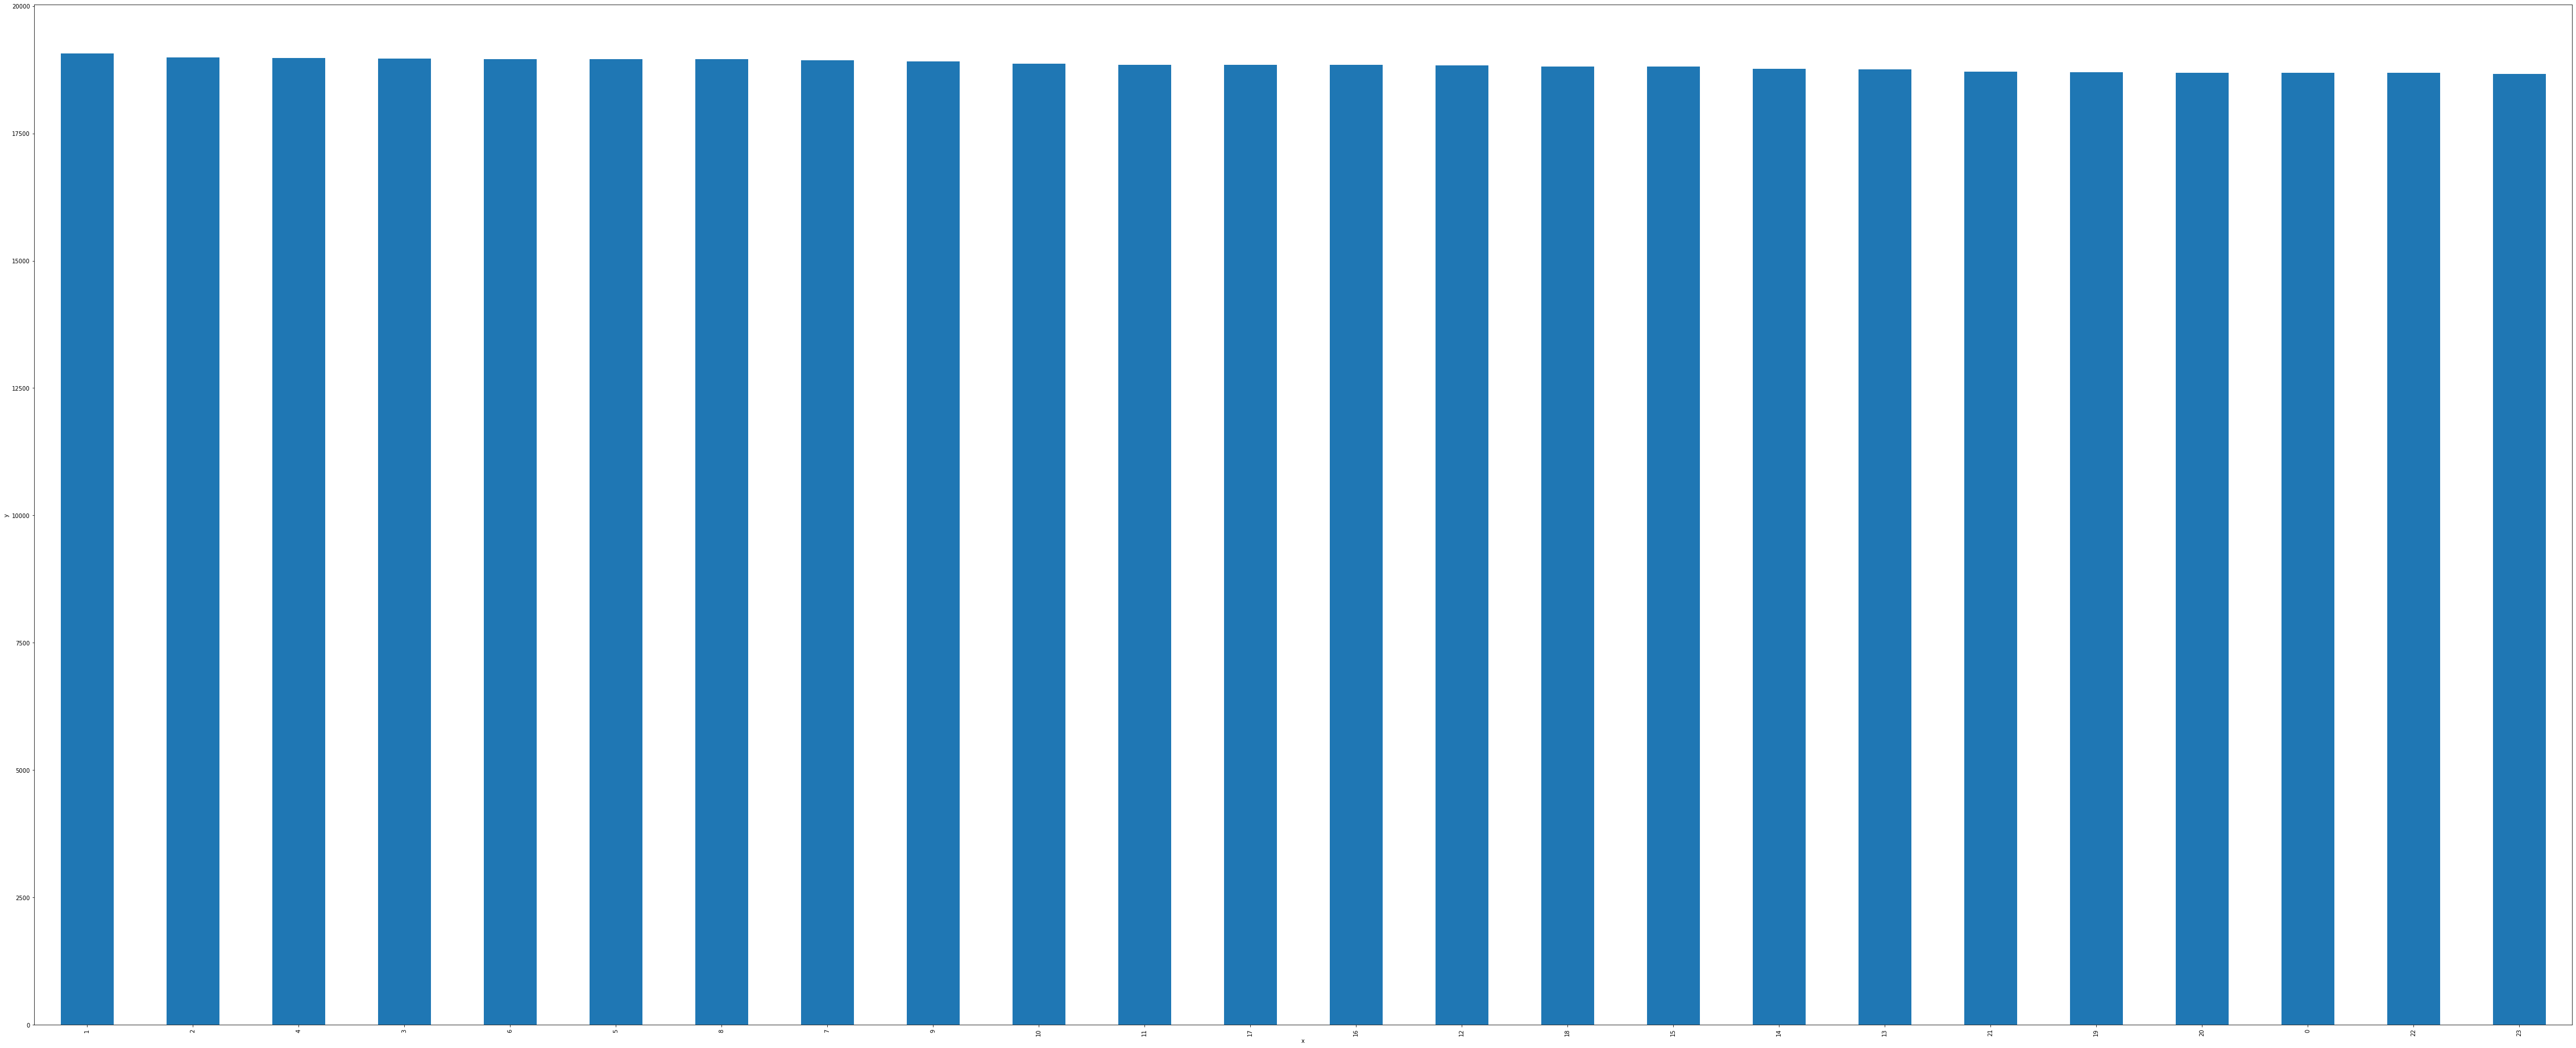

In [41]:
a = smog.Godzina.value_counts()
a.plot(kind='bar', figsize=(80, 33))
plt.ylabel('y')
plt.xlabel('x')

In [42]:
smog.Parametr.value_counts()

PM10     324145
PM2.5    128103
PR10         23
PS25          9
Name: Parametr, dtype: int64

In [43]:
smog.Miasto.value_counts()

Kraków       28367
Warszawa     21647
Bydgoszcz    13893
Gdańsk       13658
Łódź         13503
             ...  
Cieszyn       2279
Słupsk        1949
Lębork        1774
Grudziądz     1412
Augustów      1385
Name: Miasto, Length: 98, dtype: int64

Text(0.5, 0, 'x')

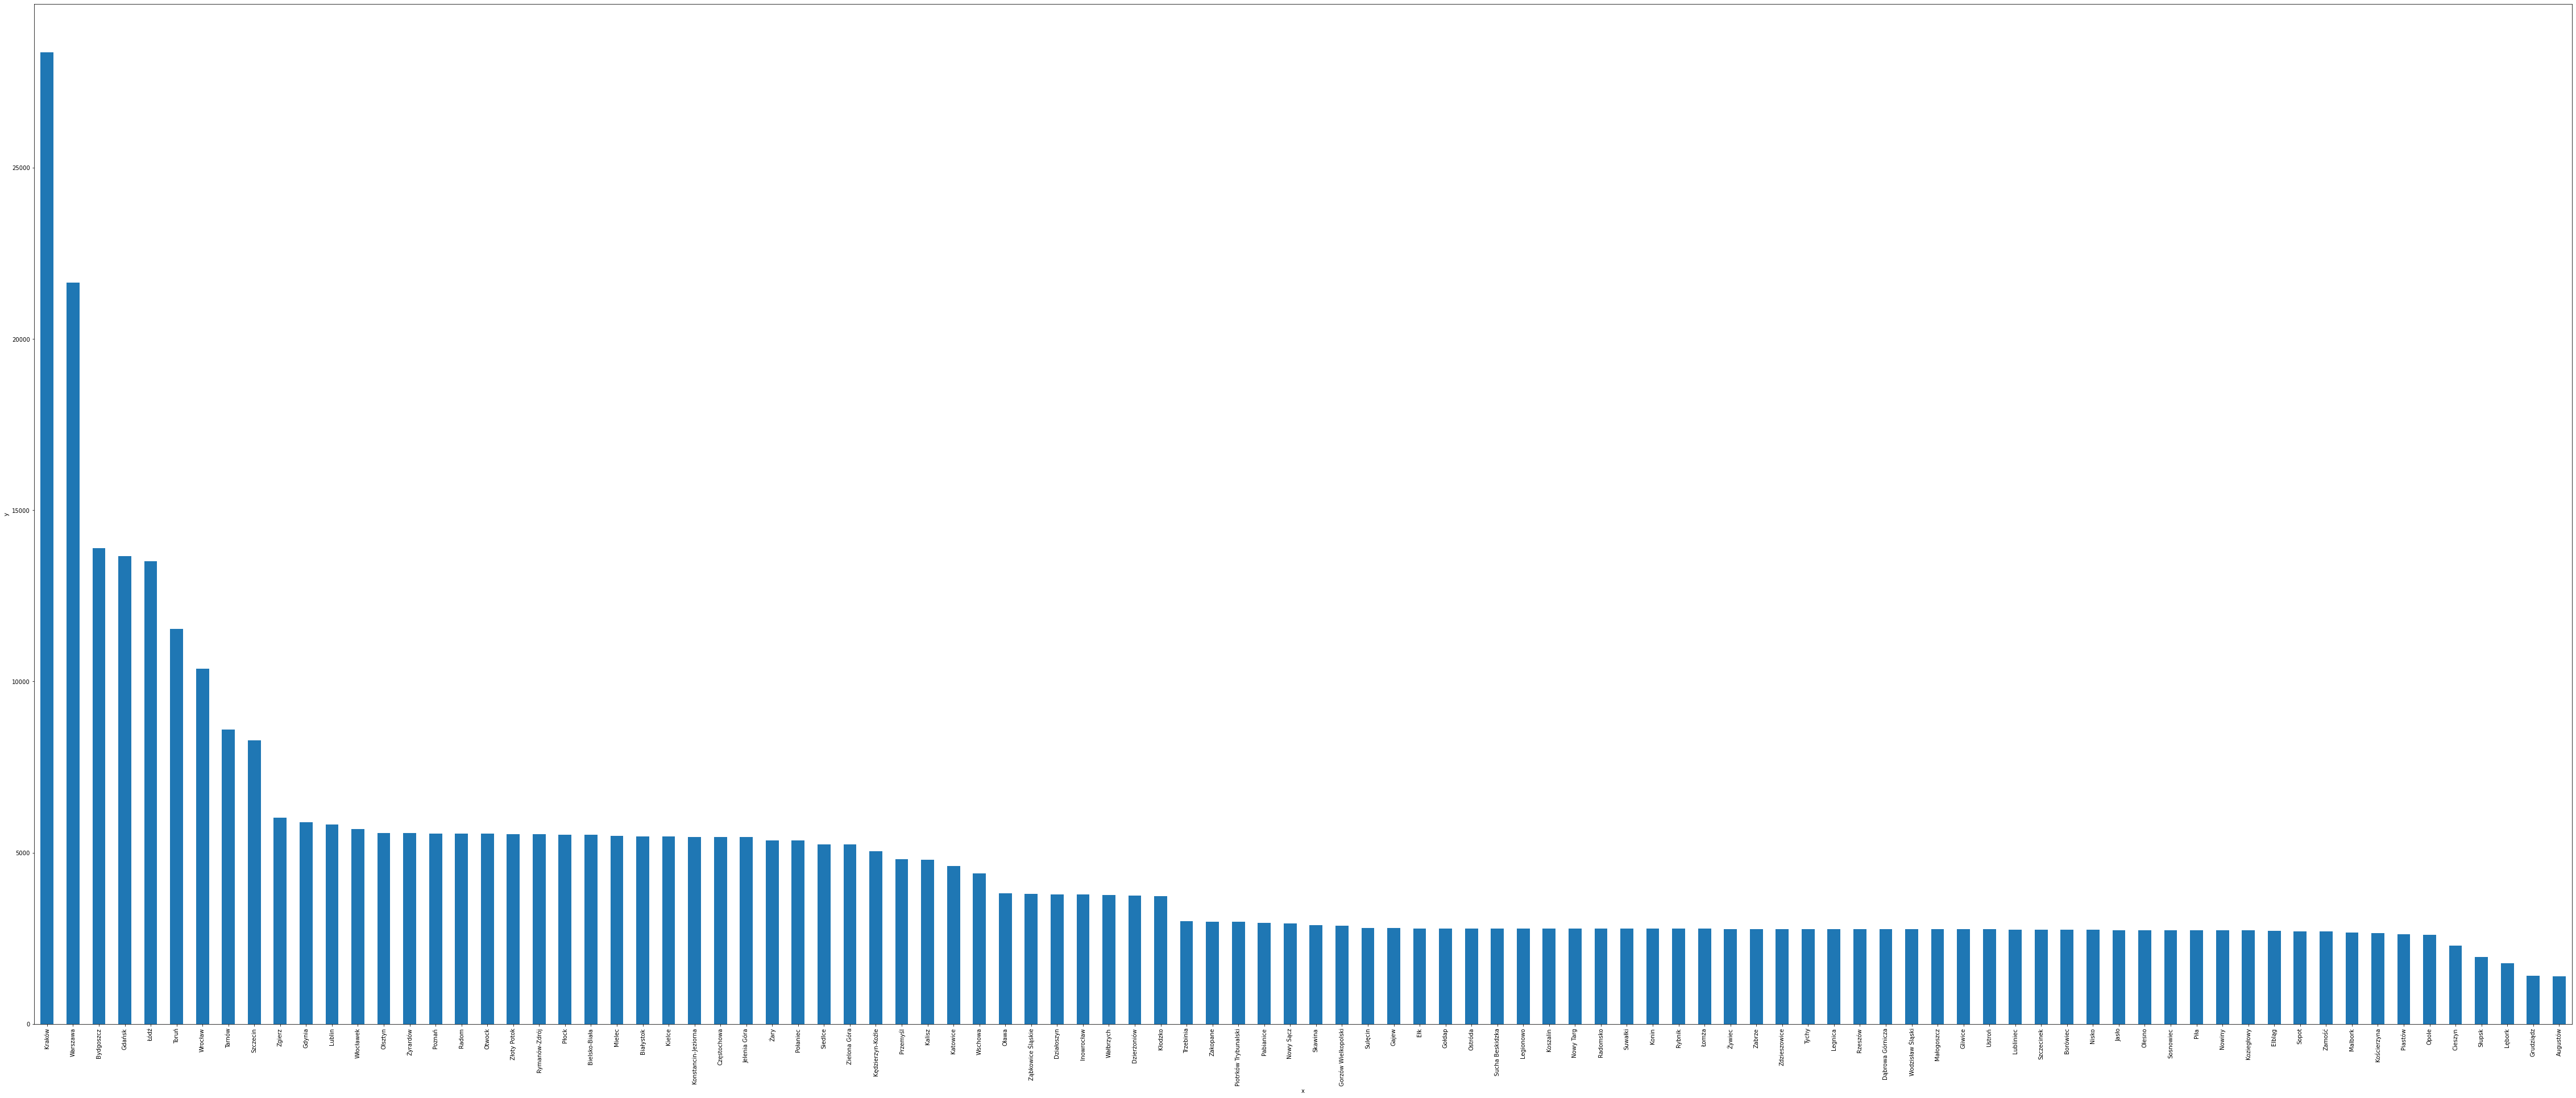

In [44]:
a = smog.Miasto.value_counts()
a.plot(kind='bar', figsize=(80, 33))
plt.ylabel('y')
plt.xlabel('x')

In [45]:
smog.Wojewodztwo.value_counts()

MAZOWIECKIE            59976
MAŁOPOLSKIE            54335
ŚLĄSKIE                50944
DOLNOŚLĄSKIE           41228
KUJAWSKO-POMORSKIE     36312
POMORSKIE              31296
ŁÓDZKIE                31039
PODKARPACKIE           24095
WIELKOPOLSKIE          21370
LUBUSKIE               20676
WARMIŃSKO-MAZURSKIE    16663
ŚWIĘTOKRZYSKIE         16316
ZACHODNIOPOMORSKIE     13824
OPOLSKIE               13155
PODLASKIE              12415
LUBELSKIE               8515
Silesia                  121
Name: Wojewodztwo, dtype: int64

# To_Frame

In [46]:
tabela = smog['Miasto'].value_counts().to_frame()
tabela.head(3)

,Miasto
Kraków,28367
Warszawa,21647
Bydgoszcz,13893


Text(0.5, 0, 'x')

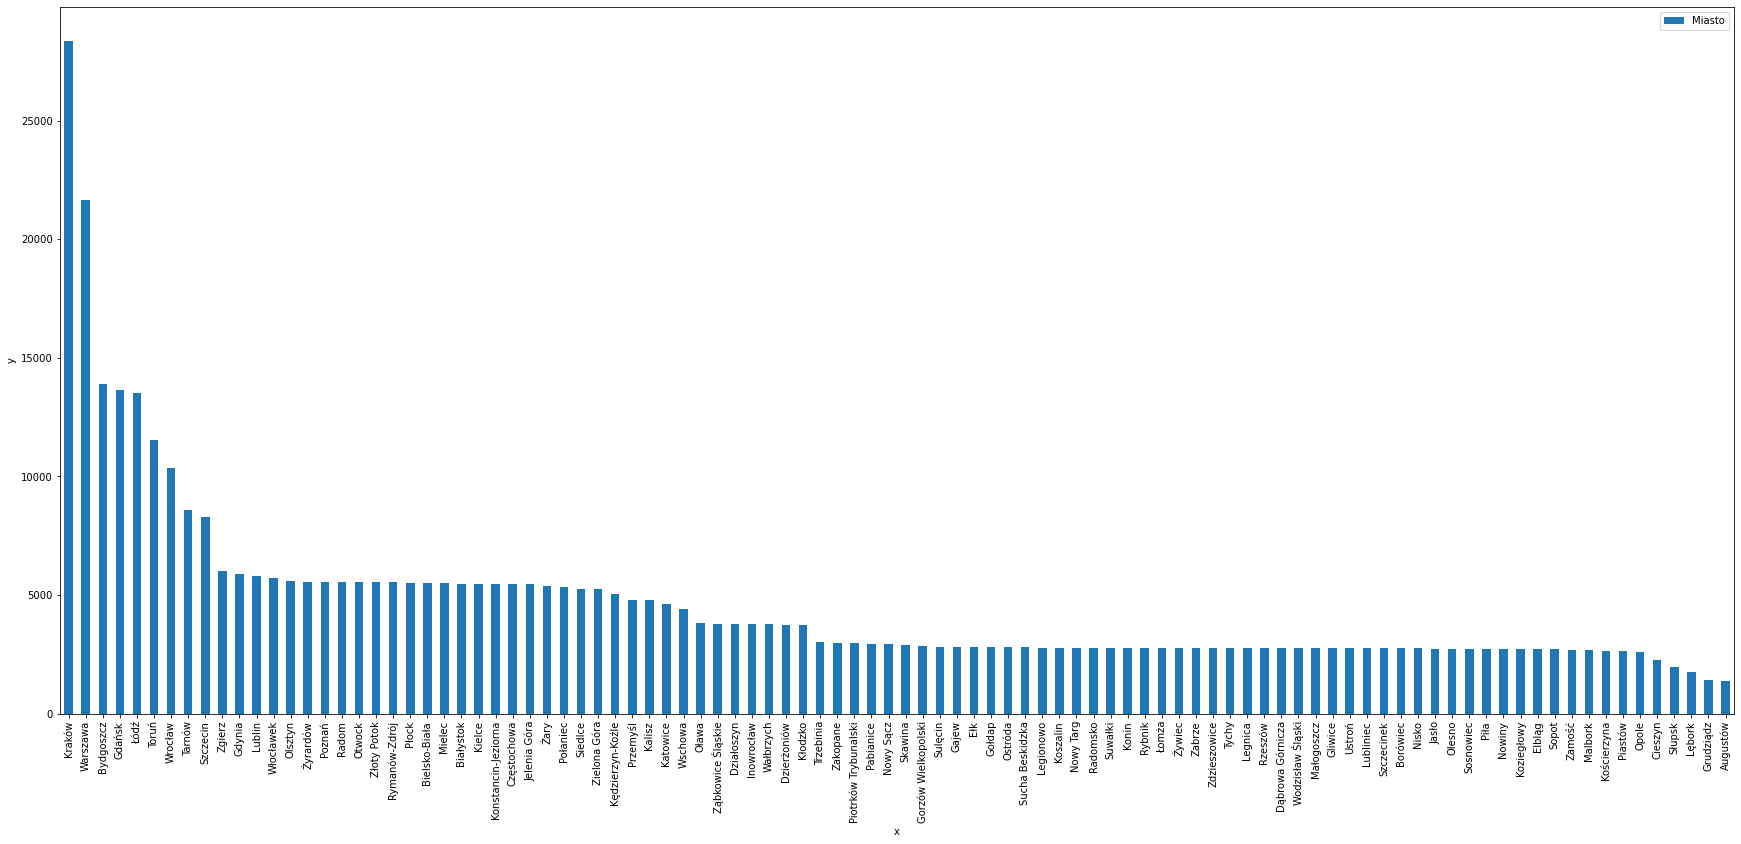

In [47]:
tabela.plot(kind='bar',figsize=(30, 13))
plt.ylabel('y')
plt.xlabel('x')

# groupby

In [48]:
#Ilość danych dla poszczególnej godziny
smog.groupby('Godzina').count()

,Data,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
Godzina,,,,,,,,
0,18686,18686,18671,18686,18686,18686,18686,18686
1,19075,19075,19062,19075,19075,19075,19075,19075
2,18988,18988,18975,18988,18988,18988,18988,18988
3,18969,18969,18951,18969,18969,18969,18969,18969
4,18980,18980,18964,18980,18980,18980,18980,18980
5,18955,18955,18931,18955,18955,18955,18955,18955
6,18960,18960,18952,18960,18960,18960,18960,18960
7,18942,18942,18921,18942,18942,18942,18942,18942
8,18954,18954,18943,18954,18954,18954,18954,18954


In [49]:
#średnia 'Wartosc' dla danej godziny
smog.groupby('Godzina').Wartosc.mean()

Godzina
0     34.451310
1     32.229797
2     30.037164
3     28.060673
4     26.460756
5     25.276450
6     24.959040
7     25.548694
8     27.044828
9     28.437793
10    27.798587
11    25.869802
12    24.194921
13    22.800914
14    22.454168
15    22.732615
16    24.686794
17    28.142456
18    32.060855
19    35.283456
20    37.273657
21    37.734109
22    37.138896
23    36.154736
Name: Wartosc, dtype: float64

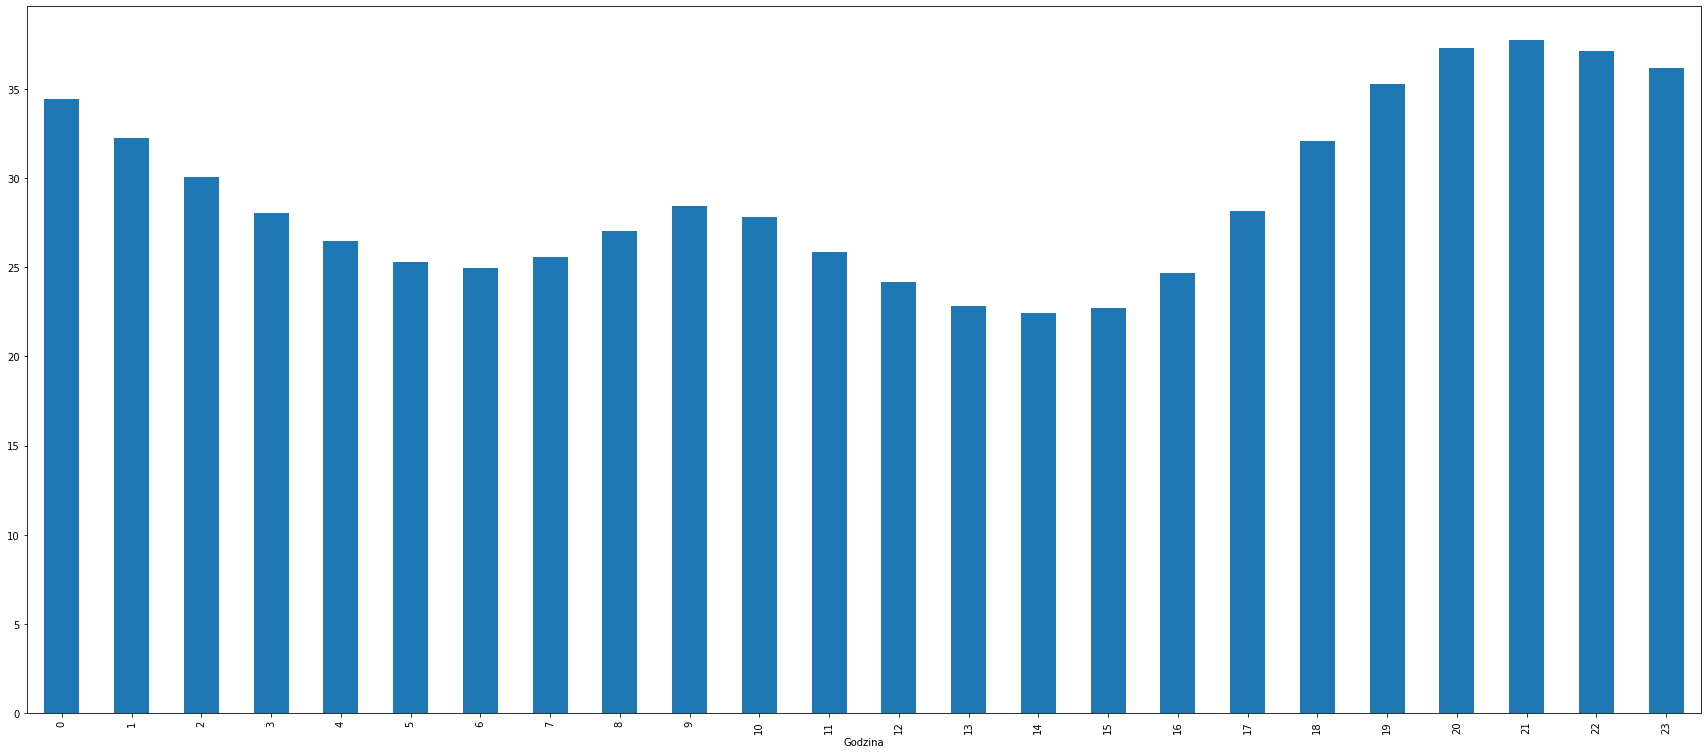

In [50]:
z = smog.groupby('Godzina').Wartosc.mean()
z.plot(kind='bar',figsize=(30, 13))

In [51]:
#średnia 'wartość' dla danej daty i miasta
smog.groupby(['Data','Miasto']).Wartosc.mean()

Data        Miasto     
2019-09-02  Bydgoszcz      17.826322
            Działoszyn     13.983092
            Dzierżoniów    10.292863
            Inowrocław     18.139938
            Kłodzko         9.212196
                             ...    
2020-02-09  Łomża          47.668421
            Łódź           30.744737
            Żary           23.260464
            Żyrardów       23.970263
            Żywiec         37.196621
Name: Wartosc, Length: 11836, dtype: float64

In [52]:
smog.groupby(['Data',smog['Miasto']=='Bydgoszcz', smog['Miasto']=='Kłodzko' ]).Wartosc.mean()

Data        Miasto  Miasto
2019-09-02  False   False     12.331874
                    True       9.212196
            True    False     17.826322
2019-09-03  False   False     13.423954
                    True      11.196326
                                ...    
2020-02-08  False   True      35.165742
            True    False     42.664583
2020-02-09  False   False     38.046975
                    True      19.702195
            True    False     38.736842
Name: Wartosc, Length: 480, dtype: float64

#  <font color='orange'><center> 2. Modyfikacja danych </center></font>
- norma średniego 24-godz. stężenia pyłu PM10 - 50 µg/m3
- norma średniego rocznego stężenia pyłu PM10 - 20 µg/m3
- norma średniego 24-godz. stężenia pyłu PM2,5 - 25 µg/m3
- norma średniego rocznego stężenia pyłu PM2,5 - 10 µg/m3

In [54]:
# Ponowne wczytanie danych, ponieważ przy przeglądaniu ich nastąpiły drobne modyfikacje
smog = pd.read_excel('C:\\Users\\V6\Desktop\\Smog.xlsx')
smog

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
0,2019-09-02,0,PM10,27.8500,52.793122,18.241044,Inowrocław,inowrocławski,KUJAWSKO-POMORSKIE
1,2019-09-02,0,PM10,24.7769,50.972167,14.941319,Działoszyn,zgorzelecki,DOLNOŚLĄSKIE
2,2019-09-02,0,PM10,7.9492,50.732817,16.648050,Dzierżoniów,dzierżoniowski,DOLNOŚLĄSKIE
3,2019-09-02,0,PM10,8.6594,50.433493,16.653660,Kłodzko,kłodzki,DOLNOŚLĄSKIE
4,2019-09-02,0,PM10,16.6597,50.942073,17.291333,Oława,oławski,DOLNOŚLĄSKIE
...,...,...,...,...,...,...,...,...,...
452275,2020-02-09,18,PM10,33.3700,50.878998,20.633692,Kielce,Kielce,ŚWIĘTOKRZYSKIE
452276,2020-02-09,18,PM2.5,26.1200,50.878998,20.633692,Kielce,Kielce,ŚWIĘTOKRZYSKIE
452277,2020-02-09,18,PM2.5,30.7245,52.420319,16.877289,Poznań,Poznań,WIELKOPOLSKIE
452278,2020-02-09,17,PM10,22.3649,50.675693,18.682065,Lubliniec,lubliniecki,ŚLĄSKIE


## Parametr
- zamiana 'PR10' na 'PM10'
- zamiana 'PS25' na 'PM2.5'

In [55]:
smog['Parametr'].value_counts()

PM10     324145
PM2.5    128103
PR10         23
PS25          9
Name: Parametr, dtype: int64

In [56]:
smog = smog.replace('PR10', 'PM10')
smog = smog.replace('PS25', 'PM2.5')

smog['Parametr'].value_counts()

PM10     324168
PM2.5    128112
Name: Parametr, dtype: int64

## Wojewodztwo
- zamiana 'Silesia' na 'ŚLĄSKIE'

In [57]:
smog['Wojewodztwo'].value_counts()

MAZOWIECKIE            59976
MAŁOPOLSKIE            54335
ŚLĄSKIE                50944
DOLNOŚLĄSKIE           41228
KUJAWSKO-POMORSKIE     36312
POMORSKIE              31296
ŁÓDZKIE                31039
PODKARPACKIE           24095
WIELKOPOLSKIE          21370
LUBUSKIE               20676
WARMIŃSKO-MAZURSKIE    16663
ŚWIĘTOKRZYSKIE         16316
ZACHODNIOPOMORSKIE     13824
OPOLSKIE               13155
PODLASKIE              12415
LUBELSKIE               8515
Silesia                  121
Name: Wojewodztwo, dtype: int64

In [58]:
smog[  smog['Wojewodztwo'] == 'Silesia'  ]

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
14481,2019-10-07,10,PM10,62.8228,49.738136,18.639069,Cieszyn,cieszyński,Silesia
14753,2019-10-05,7,PM10,5.3908,50.264611,18.975028,Katowice,Katowice,Silesia
14973,2019-10-06,15,PM10,9.2848,50.099903,18.990236,Tychy,Tychy,Silesia
15223,2019-10-06,21,PM10,16.7570,50.710889,19.458797,Złoty Potok,częstochowski,Silesia
21833,2019-10-08,5,PM10,60.1196,50.007629,18.455548,Wodzisław Śląski,wodzisławski,Silesia
...,...,...,...,...,...,...,...,...,...
423626,2020-02-01,20,PM10,13.0959,50.675693,18.682065,Lubliniec,lubliniecki,Silesia
428164,2020-02-03,3,PM10,9.5564,49.813464,19.027318,Bielsko-Biała,Bielsko-Biała,Silesia
441066,2020-02-06,16,PM10,23.8626,50.836389,19.130111,Częstochowa,Częstochowa,Silesia
445232,2020-02-07,19,PM10,88.3853,50.817676,19.117426,Częstochowa,Częstochowa,Silesia


In [59]:
# wszystkich miast jest 98
len(smog['Miasto'].unique())

98

In [60]:
# miast, które mają wpisane Wojewodztwo 'Silesia' jest 15
Silesia = smog[smog['Wojewodztwo'] =='Silesia' ]
len(Silesia['Miasto'].unique())

15

In [61]:
# wszystkie miasta
smog.Miasto.unique()

array(['Inowrocław', 'Działoszyn', 'Dzierżoniów', 'Kłodzko', 'Oława',
       'Wałbrzych', 'Wrocław', 'Toruń', 'Bydgoszcz', 'Ząbkowice Śląskie',
       'Włocławek', 'Lublin', 'Gajew', 'Łódź', 'Pabianice',
       'Piotrków Trybunalski', 'Zgierz', 'Gorzów Wielkopolski', 'Sulęcin',
       'Wschowa', 'Zielona Góra', 'Kraków', 'Nowy Sącz', 'Skawina',
       'Tarnów', 'Trzebinia', 'Zakopane', 'Płock', 'Radom', 'Siedlce',
       'Warszawa', 'Żyrardów', 'Kędzierzyn-Koźle', 'Olesno',
       'Zdzieszowice', 'Białystok', 'Łomża', 'Jasło', 'Przemyśl',
       'Gdańsk', 'Gdynia', 'Sopot', 'Kościerzyna', 'Malbork', 'Nowiny',
       'Połaniec', 'Bielsko-Biała', 'Cieszyn', 'Częstochowa',
       'Dąbrowa Górnicza', 'Gliwice', 'Katowice', 'Rybnik', 'Sosnowiec',
       'Tychy', 'Ustroń', 'Wodzisław Śląski', 'Zabrze', 'Złoty Potok',
       'Gołdap', 'Olsztyn', 'Konin', 'Poznań', 'Kalisz', 'Koszalin',
       'Szczecinek', 'Szczecin', 'Legionowo', 'Legnica', 'Nisko',
       'Rzeszów', 'Żary', 'Jelenia Góra', 

In [62]:
# miasta, które mają wpisane Wojewodztwo 'Silesia'
Silesia.Miasto.unique()

array(['Cieszyn', 'Katowice', 'Tychy', 'Złoty Potok', 'Wodzisław Śląski',
       'Rybnik', 'Sosnowiec', 'Bielsko-Biała', 'Dąbrowa Górnicza',
       'Gliwice', 'Zabrze', 'Ustroń', 'Lubliniec', 'Częstochowa',
       'Żywiec'], dtype=object)

In [63]:
# należałoby sprawdzić czy te 15 miast należy do województwa 'ŚLĄSKIE'
# na potrzeby zadania przyjąłem, że tak (bez sprawdzania)

smog = smog.replace('Silesia', 'ŚLĄSKIE') # zamiana 'Silesia' na 'ŚLĄSKIE'
smog['Wojewodztwo'].value_counts()

MAZOWIECKIE            59976
MAŁOPOLSKIE            54335
ŚLĄSKIE                51065
DOLNOŚLĄSKIE           41228
KUJAWSKO-POMORSKIE     36312
POMORSKIE              31296
ŁÓDZKIE                31039
PODKARPACKIE           24095
WIELKOPOLSKIE          21370
LUBUSKIE               20676
WARMIŃSKO-MAZURSKIE    16663
ŚWIĘTOKRZYSKIE         16316
ZACHODNIOPOMORSKIE     13824
OPOLSKIE               13155
PODLASKIE              12415
LUBELSKIE               8515
Name: Wojewodztwo, dtype: int64

##  Wartosc
- usuniecie rekordów z wartościami < 0
- usuniecie rekordów z brakiem wartości (Null)

In [64]:
# mam 452280 rekordów
smog.shape

(452280, 9)

In [65]:
# 132 rekordy ('Wartosc' < 0)
smog[  (smog['Wartosc'] < 0 )  ]

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
2984,2019-09-12,2,PM10,-22.6640,50.433493,16.653660,Kłodzko,kłodzki,DOLNOŚLĄSKIE
3755,2019-09-14,13,PM10,-10.6657,50.592325,16.819786,Ząbkowice Śląskie,ząbkowicki,DOLNOŚLĄSKIE
16202,2019-10-06,8,PM2.5,-7.7100,52.053811,20.429892,Żyrardów,żyrardowski,MAZOWIECKIE
19847,2019-10-07,17,PM2.5,-14.0000,51.775411,19.450900,Łódź,Łódź,ŁÓDZKIE
23639,2019-10-08,17,PM10,-17.4172,50.018253,20.992578,Tarnów,Tarnów,MAŁOPOLSKIE
...,...,...,...,...,...,...,...,...,...
444151,2020-02-07,13,PM10,-2.1796,50.876983,18.416878,Olesno,oleski,OPOLSKIE
448077,2020-02-08,15,PM2.5,-19.6331,50.069308,20.053492,Kraków,Kraków,MAŁOPOLSKIE
449073,2020-02-08,20,PM10,-73.7856,50.098508,20.018269,Kraków,Kraków,MAŁOPOLSKIE
450049,2020-02-09,4,PM10,-41.5500,51.399084,21.147474,Radom,Radom,MAZOWIECKIE


In [66]:
smog.isnull().sum().sum()

365

In [67]:
smog.isnull().sum()

Data             0
Godzina          0
Parametr         0
Wartosc        365
SzerGeo          0
DlugGeo          0
Miasto           0
Powiat           0
Wojewodztwo      0
dtype: int64

In [68]:
smog = smog.mask(smog.Wartosc < 0) # zamienia dane dla rekordów, które mają ('Wartosc' < 0) na null

In [69]:
smog[  (smog['Wartosc'] < 0 )  ]

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo


In [70]:
smog.isnull().sum().sum()

1553

In [71]:
smog.isnull().sum()

Data           132
Godzina        132
Parametr       132
Wartosc        497
SzerGeo        132
DlugGeo        132
Miasto         132
Powiat         132
Wojewodztwo    132
dtype: int64

In [72]:
smog = smog.dropna(axis=0, how="any") # usuwa 'NaN'

In [73]:
smog.isnull().sum()

Data           0
Godzina        0
Parametr       0
Wartosc        0
SzerGeo        0
DlugGeo        0
Miasto         0
Powiat         0
Wojewodztwo    0
dtype: int64

In [74]:
smog.shape

(451783, 9)

In [75]:
a = 452280 - 451783
a # = 365 'null' oraz 132 ('Wartosc' < 0)

497

#  <font color='orange'><center> 3. Prezentacja danych na wykresach</center></font>

In [76]:
pm10 = smog['Parametr'] == 'PM10'
pm25 = smog['Parametr'] == 'PM2.5'
 
wykres1 = smog[(smog['DlugGeo'] == 21.004724) & (smog['Data'] == '2019-10-07') & (smog['Miasto'] == 'Warszawa') & (smog['Parametr'] == 'PM10')].head(24) #Warszawa-Komunikacyjna
wykres1.sort_values(by=['Godzina'], inplace=True)
#wykres1
wykres2 = smog[(smog['DlugGeo'] == 21.004724) & (smog['Data'] == '2019-10-07') & (smog['Miasto'] == 'Warszawa') & (smog['Parametr'] == 'PM2.5')].head(24) #Warszawa-Komunikacyjna
wykres2.sort_values(by=['Godzina'], inplace=True)
#wykres2

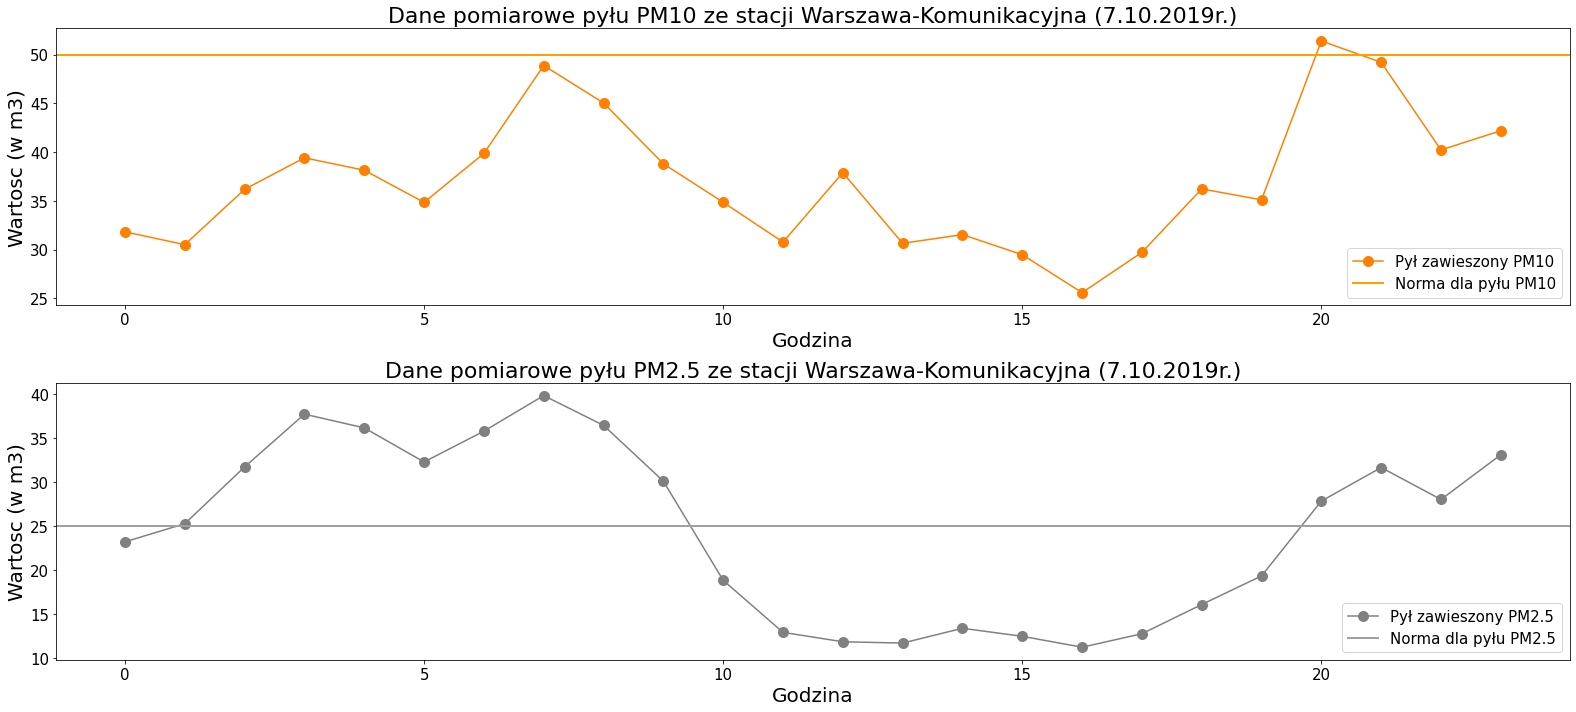

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(22, 10))

plt.subplot(211)
plt.plot(wykres1['Godzina'], wykres1['Wartosc'],
            label = 'Pył zawieszony PM10',
            color = '#FF8000',
            marker='.',
            markersize=20)
plt.axhline(y=50, color='#FFA000', linestyle='-', linewidth=2, label='Norma dla pyłu PM10')

plt.title(label='Dane pomiarowe pyłu PM10 ze stacji Warszawa-Komunikacyjna (7.10.2019r.)', fontsize=22, color="black")
plt.legend(loc = 4, fontsize=15)
plt.xlabel('Godzina', fontsize=20, color="black")
plt.ylabel('Wartosc (w m3)', fontsize=20, color="black")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(212)
plt.plot(wykres2['Godzina'], wykres2['Wartosc'],
            label = 'Pył zawieszony PM2.5',
            color = '#808080',
            marker='.',
            markersize=20)
plt.axhline(y=25, color='#a0a0a0', linestyle='-', linewidth=2, label='Norma dla pyłu PM2.5')

plt.title(label='Dane pomiarowe pyłu PM2.5 ze stacji Warszawa-Komunikacyjna (7.10.2019r.)', fontsize=22, color="black")
plt.legend(loc = 4, fontsize=15)
plt.xlabel('Godzina', fontsize=20, color="black")
plt.ylabel('Wartosc (w m3)', fontsize=20, color="black")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig.tight_layout()
plt.show()

In [78]:
wykres3 = smog[(smog['SzerGeo'] == 50.057678) & (smog['Data'] >= '2019-11-01') & (smog['Data'] <= '2019-11-30') & (smog['Miasto'] == 'Kraków') & (smog['Parametr'] == 'PM10')] #Warszawa-Komunikacyjna
wykres3.sort_values(by=['Data', 'Godzina'], inplace=True) #Kraków, Aleja Krasińskiego
wykres3.drop(columns=['Godzina', 'SzerGeo', 'DlugGeo'], inplace=True)
wykres3 = wykres3.groupby(wykres3['Data']).mean()
wykres3['dataa'] = np.arange(1,31)
#wykres3

<ipython-input-78-70d1b053c409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wykres3.sort_values(by=['Data', 'Godzina'], inplace=True) #Kraków, Aleja Krasińskiego
C:\Users\V6\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


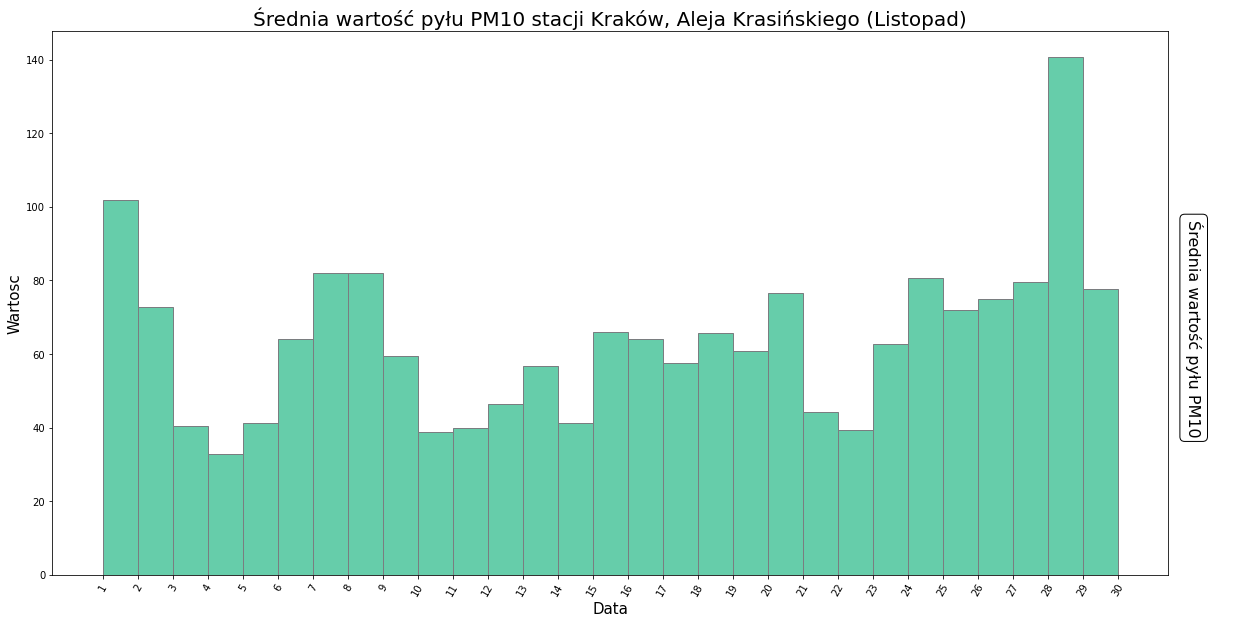

In [79]:
figure=plt.figure(figsize=(20,10))
ax1 = figure.add_subplot()
n, bins, patches = ax1.hist(wykres3.dataa,bins = 29, weights= wykres3.Wartosc,facecolor='mediumaquamarine',edgecolor='#7a7d80')


ax1.annotate('Średnia wartość pyłu PM10',xy=(.95,.30), xycoords='figure fraction',horizontalalignment='center',verticalalignment='bottom',fontsize=16,bbox=dict(boxstyle="round", fc="white"),rotation=-90)

#ax1.set_yticklabels([])
plt.xticks(bins, rotation=60)
plt.title('Średnia wartość pyłu PM10 stacji Kraków, Aleja Krasińskiego (Listopad)', fontsize=20)
plt.xlabel('Data', fontsize=15)
plt.ylabel('Wartosc', fontsize=15)
plt.show()

In [80]:
wykres4 = smog[(smog['Data'] == '2019-12-07') & (smog['Miasto'] == 'Warszawa') & (smog['Parametr'] == 'PM2.5')]
wykres4.sort_values(by='Godzina')
wykres4.drop(columns=['SzerGeo', 'DlugGeo'], inplace=True)
wykres4 = wykres4.groupby(wykres4['Godzina']).mean()
wykres4['godzina'] = np.arange(0,24)
# wykres4

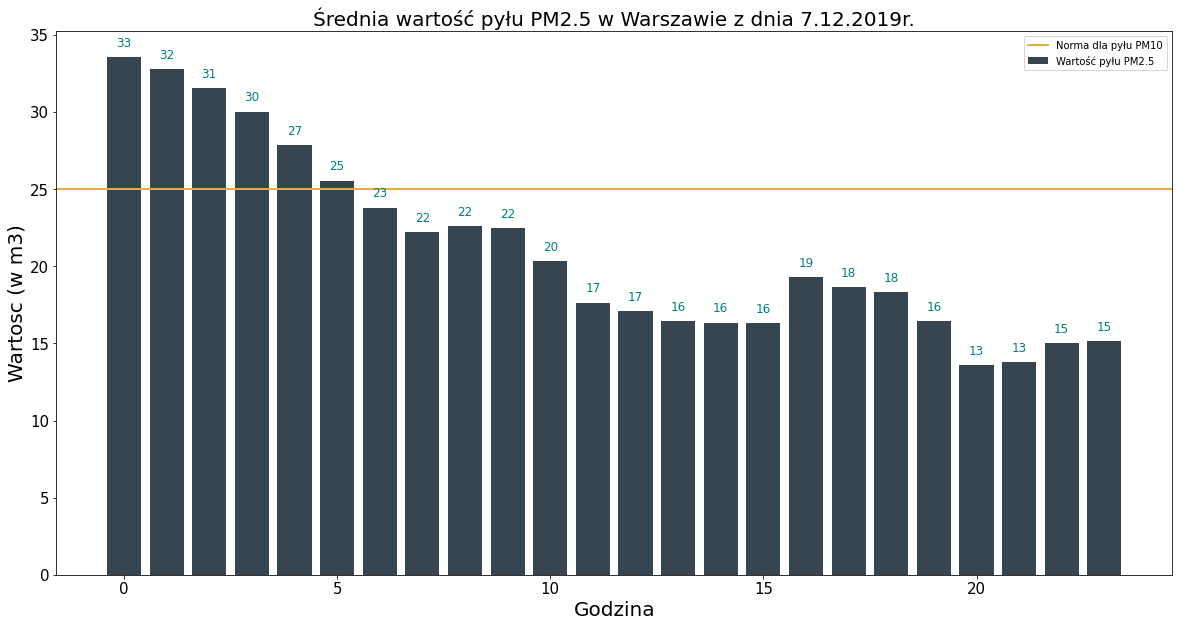

In [81]:
figure=plt.figure(figsize=(20,10))
ax1 = figure.add_subplot()

bar1 = ax1.bar(x = wykres4.godzina, height = wykres4.Wartosc, color = '#36454f', label = 'Wartość pyłu PM2.5')

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height + 0.5, '%d' % int(height), ha='center', va='bottom', fontsize=12, color = '#008080')

plt.axhline(y=25, color='#e3af34', linestyle='-', linewidth=2, label='Norma dla pyłu PM10')
plt.title('Średnia wartość pyłu PM2.5 w Warszawie z dnia 7.12.2019r.',  fontsize=20)
plt.xlabel('Godzina', fontsize=20, color="black")
plt.ylabel('Wartosc (w m3)', fontsize=20, color="black")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

### Bibliografia:

Przy przeglądaniu danych głównie bazowałem na kursie: https://analityk.edu.pl/python-pandas-mega-tutorial/

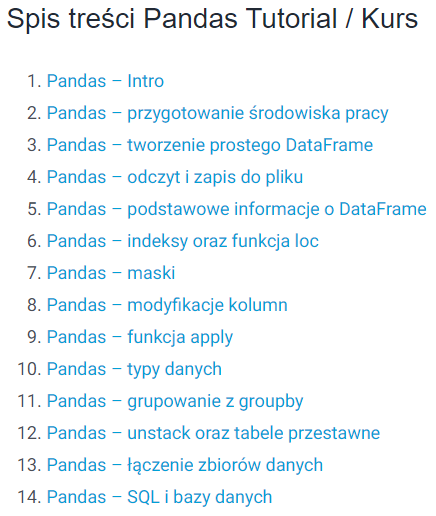
